In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [3]:
cal_data = pd.read_csv("calories.csv")

In [4]:
cal_data.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [5]:
ex_data = pd.read_csv("exercise.csv")

In [6]:
ex_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [11]:
#combining the two dataframes
calex_data = pd.concat([ex_data,cal_data['Calories']],axis=1)

In [12]:
calex_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [14]:
calex_data.shape

(15000, 9)

In [16]:
calex_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [17]:
#checking for missing values
calex_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [18]:
#data analysis

In [19]:
calex_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


<Axes: xlabel='Gender', ylabel='count'>

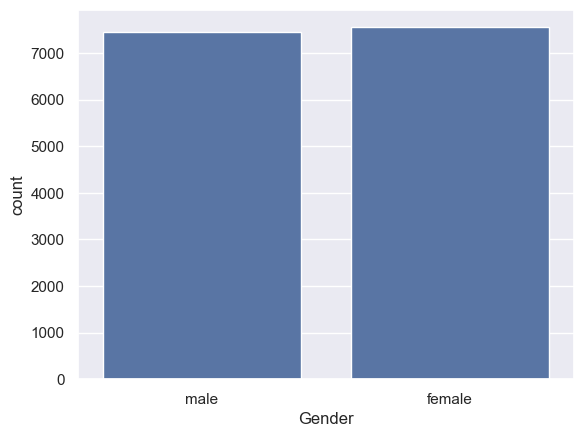

In [21]:
#data visualization
sns.set()
#plotting the gender column in countplot
sns.countplot(x=calex_data['Gender'])

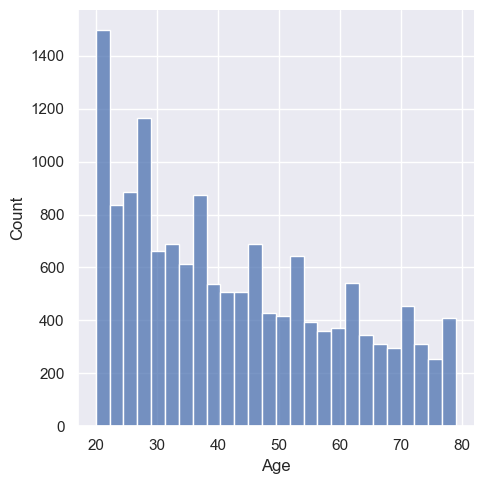

In [22]:
#finding the distribution of age column
sns.displot(calex_data['Age'])

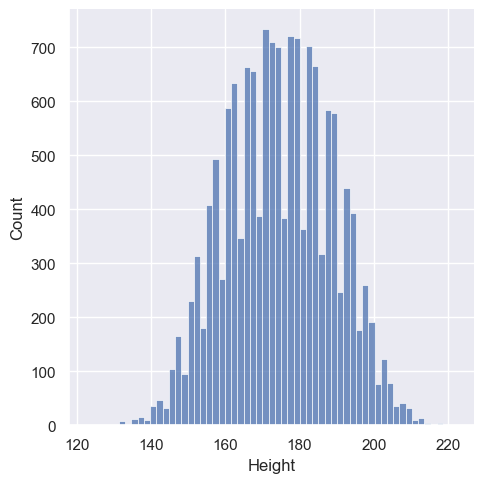

In [23]:
#finding the distribution of height column
sns.displot(calex_data['Height'])

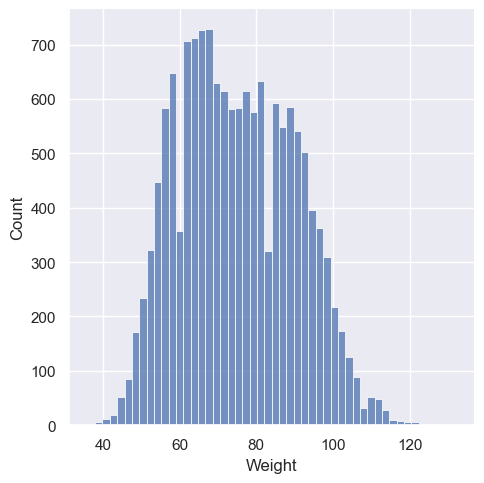

In [24]:
#finding the distribution of weight column
sns.displot(calex_data['Weight'])

In [35]:
calex_data['gender_encoded'] = calex_data['Gender'].map({'male': 0, 'female': 1})
calex_data.drop(columns='Gender',axis=1,inplace=True)

In [36]:
calex_data.head()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,gender_encoded
0,14733363,68,190.0,94.0,29.0,105.0,40.8,231.0,0
1,14861698,20,166.0,60.0,14.0,94.0,40.3,66.0,1
2,11179863,69,179.0,79.0,5.0,88.0,38.7,26.0,0
3,16180408,34,179.0,71.0,13.0,100.0,40.5,71.0,1
4,17771927,27,154.0,58.0,10.0,81.0,39.8,35.0,1


In [37]:
#finding the correlation between columns
correlation = calex_data.corr()

<Axes: >

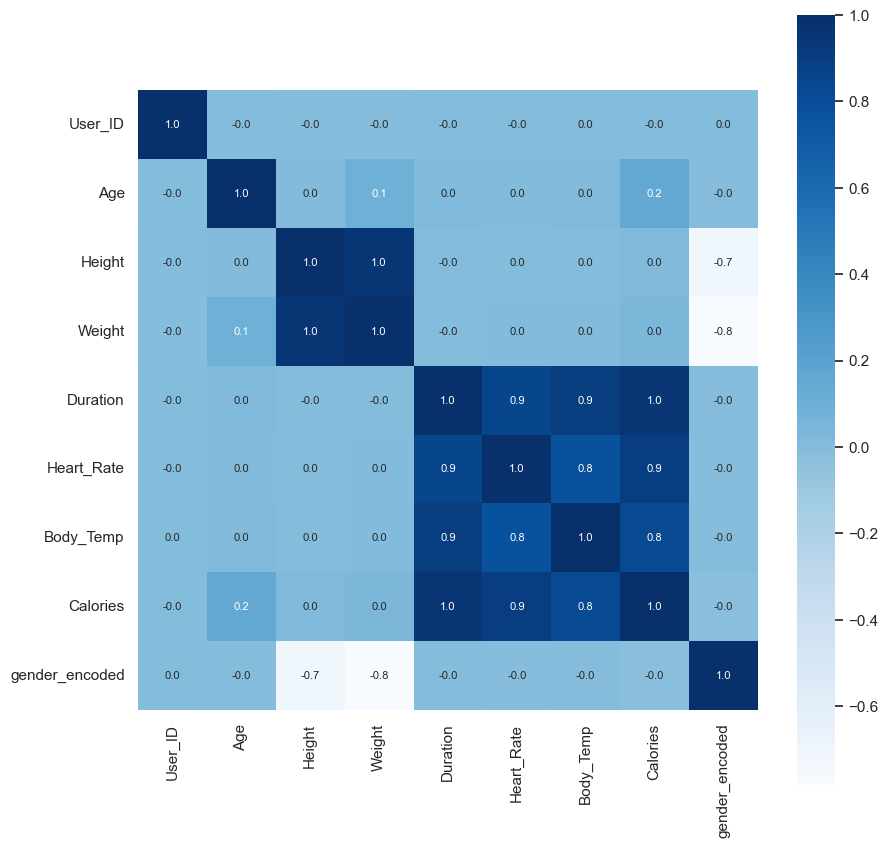

In [40]:
#heatmap
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True,square=True,fmt='.1F',annot=True,annot_kws={'size':8},cmap='Blues')

In [42]:
#splitting the data to target and features

x = calex_data.drop(columns=['User_ID','Calories'],axis=1)
y= calex_data['Calories']

In [43]:
#train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [45]:
#Model Training XGBOOST REGRESSOR
model = XGBRegressor()

In [48]:
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [50]:
#model evaluation
training_data_pre = model.predict(x_train)
#mnean absolute error
mae = metrics.mean_absolute_error(y_train,training_data_pre)
print(mae)

0.9447468986184492


In [ ]:
test_data_pre = model.predict(x_test)
mae = metrics.mean_absolute_error(y_test,test_data_pre)